# Data Analytics Project
## Project: *New York* City Taxi Trip Duration


In [1]:
#import neccessary libraries for this project
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#importing the datasets
train_data_raw=pd.read_csv("train.csv")

In [3]:
train_data_raw.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
len_train_data=len(train_data_raw)

In [5]:
print "Total number of records in train data: {}".format(len_train_data)

Total number of records in train data: 1458644


Now we will check for missing values for each column

In [6]:
train_data_raw.isnull().sum(axis=0)/train_data_raw.shape[0]

id                    0.0
vendor_id             0.0
pickup_datetime       0.0
dropoff_datetime      0.0
passenger_count       0.0
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
store_and_fwd_flag    0.0
trip_duration         0.0
dtype: float64

As we can see do not have any missing values in any of the columns. We will now examine the data types of each of the columns

In [7]:
train_data_raw.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Now we will extract hour, day of the week and the month from the pickup_datetime column.

In [8]:
# set datetime to pandas form for train dataset
train_data_raw["pickup_datetime"]=pd.to_datetime(train_data_raw["pickup_datetime"])

In [9]:
#extracting diffrent attributes for train dataset 
train_data_raw['pweekday'] = train_data_raw['pickup_datetime'].dt.weekday
train_data_raw['phour'] = train_data_raw['pickup_datetime'].dt.hour
train_data_raw['pmonth'] = train_data_raw['pickup_datetime'].dt.month

Now our train and test dataset looks something like this.

In [10]:
train_data_raw.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pweekday,phour,pmonth
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,17,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,19,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,13,3


In [11]:
train_data_raw.shape

(1458644, 14)

Now we will refine our dateset by removing attributes which are not neccessary. We will also remove outliers.

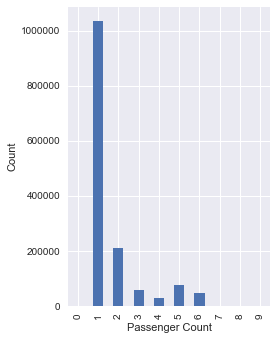

In [12]:
plt.subplot(1,2,2)
data = train_data_raw['passenger_count'].value_counts().sort_index()
data.plot(kind='bar')
plt.xlabel('Passenger Count')
plt.ylabel('Count')
plt.show()

Notice that value_counts() givs only the non-null values... so apparently there were rides with zero passengers! Lets keep in mind this when we exclude outliers.

In [13]:
train_data_raw.drop(train_data_raw[train_data_raw.passenger_count ==0].index, inplace=True)

Plotting the heat map of the pickup and dropoff coordinates.

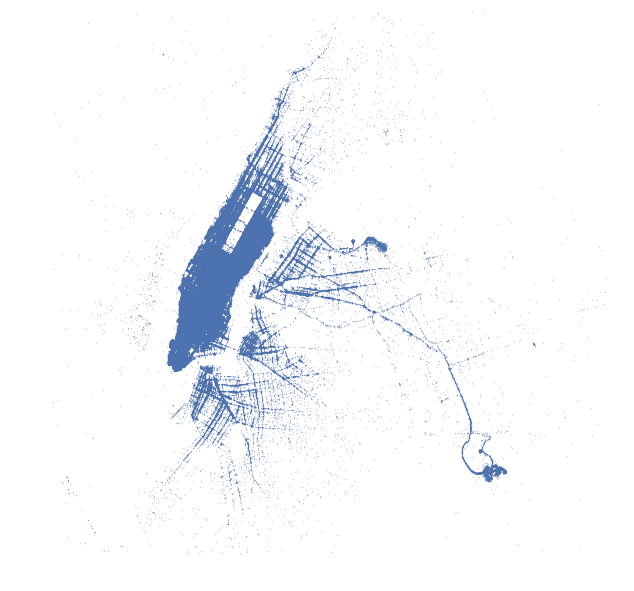

In [14]:
plt.figure(figsize=(10,10))

plt.scatter(x=train_data_raw['pickup_longitude'].values,y=train_data_raw['pickup_latitude'].values, marker='^',s=1,alpha=.3)
plt.xlim([-74.1,-73.7])
plt.ylim([40.6, 40.9])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')
plt.show()

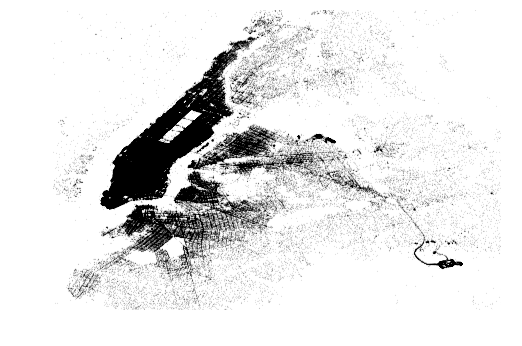

In [15]:
plt.scatter(x=train_data_raw['dropoff_longitude'].values,y=train_data_raw['dropoff_latitude'].values, marker='v',s=1,alpha=.1,color="black")
plt.xlim([-74.05,-73.75])
plt.ylim([40.6, 40.9])
plt.axis('off')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [16]:
train_data_raw.skew()

vendor_id             -0.140153
passenger_count        2.128188
pickup_longitude    -418.130701
pickup_latitude        5.489951
dropoff_longitude   -425.344560
dropoff_latitude     -20.673748
trip_duration        343.247494
pweekday              -0.043070
phour                 -0.444587
pmonth                -0.014751
dtype: float64

We see that there is lot of skewness in our data so we will need to remove outliers and normalize it. Now finding the distance with the help of pickup and dropoff coordinates. 

In [17]:
'''
def locationFeatures( df ):
    #displacement
    df['y_dis'] = df['pickup_longitude'] - df['dropoff_longitude']
    df['x_dis'] = df['pickup_latitude'] - df['dropoff_latitude']
    
    #square distance
    df['dist_sq'] = (df['y_dis'] ** 2) + (df['x_dis'] ** 2)
    
    #distance
    df['dist_sqrt'] = df['dist_sq'] ** 0.5
    
    return df
'''

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [18]:
train_data_raw['radial_distance'] = haversine_np(train_data_raw.pickup_longitude, train_data_raw.pickup_latitude,
                                           train_data_raw.dropoff_longitude, train_data_raw.dropoff_latitude)

In [19]:
train_data_raw.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pweekday,phour,pmonth,radial_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,17,3,1.497580
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,6,1.804374
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,1,6.381090
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,19,4,1.484566
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,13,3,1.187842


** Exploratory Analysis **

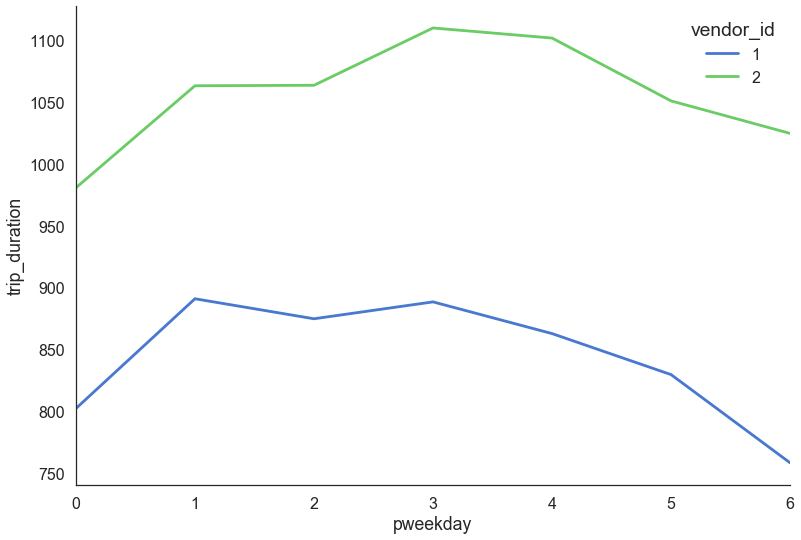

In [20]:
summary_wdays_avg_duration = pd.DataFrame(train_data_raw.groupby(['vendor_id','pweekday'])['trip_duration'].mean())
summary_wdays_avg_duration.reset_index(inplace = True)
summary_wdays_avg_duration['unit']=1
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")
sns.tsplot(data=summary_wdays_avg_duration, time="pweekday", unit = "unit", condition="vendor_id", value="trip_duration")
sns.despine(bottom = False)

We can say that users prefer vendor 2 for long distance travel as on all days of the week vendor 2 takes more time or average duration is more when compared with vendor 1. 

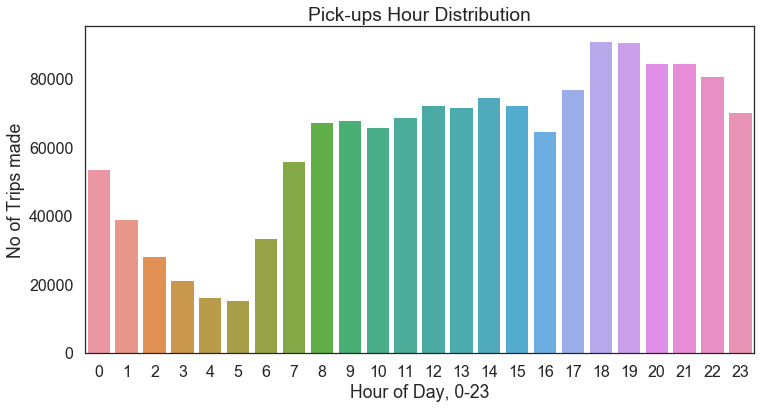

In [21]:
plt.figure(figsize=(12,6))

data = train_data_raw.groupby('phour').aggregate({'id':'count'}).reset_index()
sns.barplot(x='phour', y='id', data=data)

plt.title('Pick-ups Hour Distribution')
plt.xlabel('Hour of Day, 0-23')
plt.ylabel('No of Trips made')
pass

We see that during peak hours the trips made are very high which drops considerably during midnight

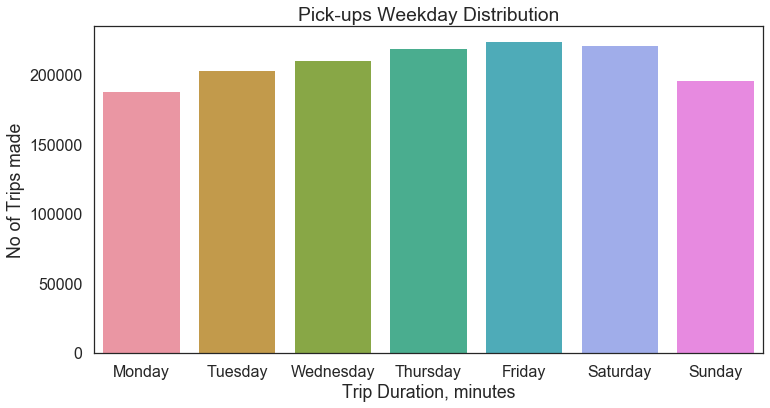

In [22]:
# pickup distribution, by weekday
plt.figure(figsize=(12,6))
pwnames = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data = train_data_raw.groupby('pweekday').aggregate({'id':'count'}).reset_index()
sns.barplot(x='pweekday', y='id', data=data)

plt.title('Pick-ups Weekday Distribution')
plt.xlabel('Trip Duration, minutes')
plt.xticks(range(0,7),pwnames, rotation='horizontal')
plt.ylabel('No of Trips made')
pass

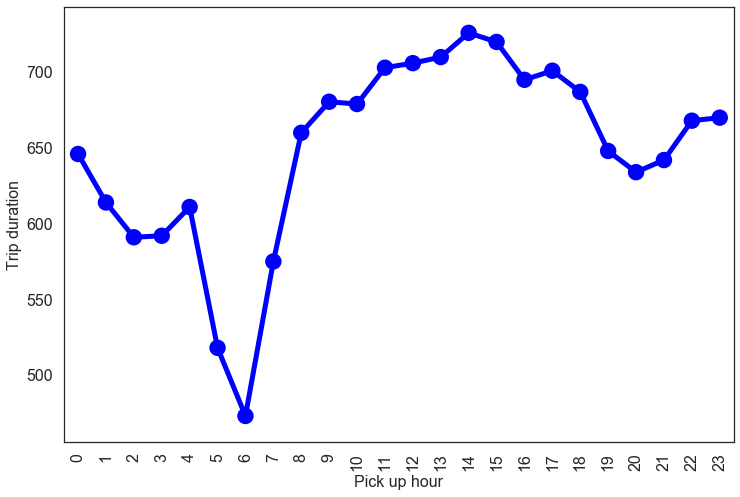

In [23]:
data_an = train_data_raw.groupby('phour')['trip_duration'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
#sns.barplot(data_an.phour.values, data_an.trip_duration.values, data=data_an)
sns.pointplot(data_an.phour.values, data_an.trip_duration.values,color='blue')
plt.ylabel('Trip duration', fontsize=16)
plt.xlabel('Pick up hour', fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

We see that during peak hour the time taken for a trip is more which may be due to the traffic on road during peak hours. This also suggestes that during peak hours we have more traffic on the road when compared to non-peak hours.

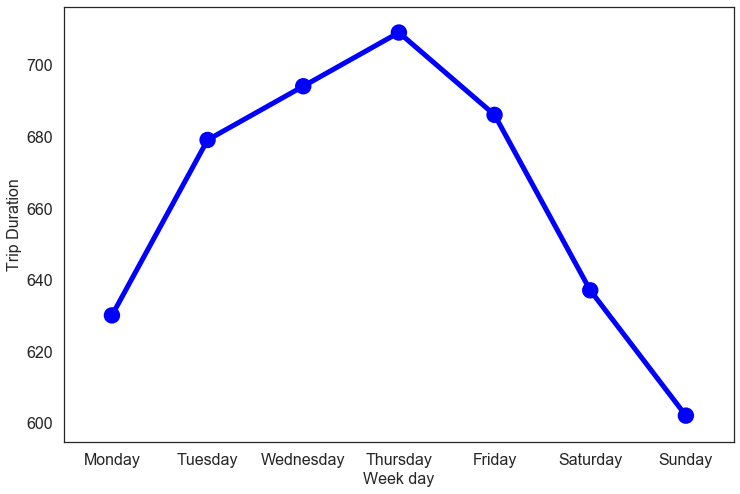

In [24]:
pwnames = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_an = train_data_raw.groupby('pweekday')['trip_duration'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
#sns.barplot(data_an.pweekday.values, data_an.trip_duration.values)
sns.pointplot(data_an.pweekday.values, data_an.trip_duration.values,color='blue')
plt.ylabel('Trip Duration', fontsize=16)
plt.xlabel('Week day', fontsize=16)
#plt.xticks(rotation='vertical')
plt.xticks(range(0,7),pwnames, rotation='horizontal')
plt.show()

We see that during the weekends the trip duration is less when compared to working days. This suggests that during weekends traffic on the road is less.

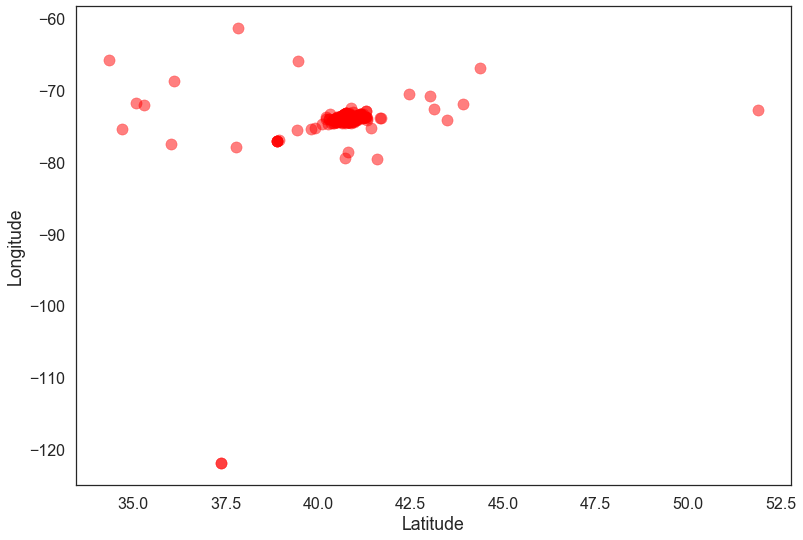

In [25]:
x = train_data_raw['pickup_latitude']
y = train_data_raw['pickup_longitude']
plt.scatter(x, y,alpha=0.5,color='red')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

We can see many outliers in this so it's very important to take care of it

**Removing outliers and cleaning our dataset **

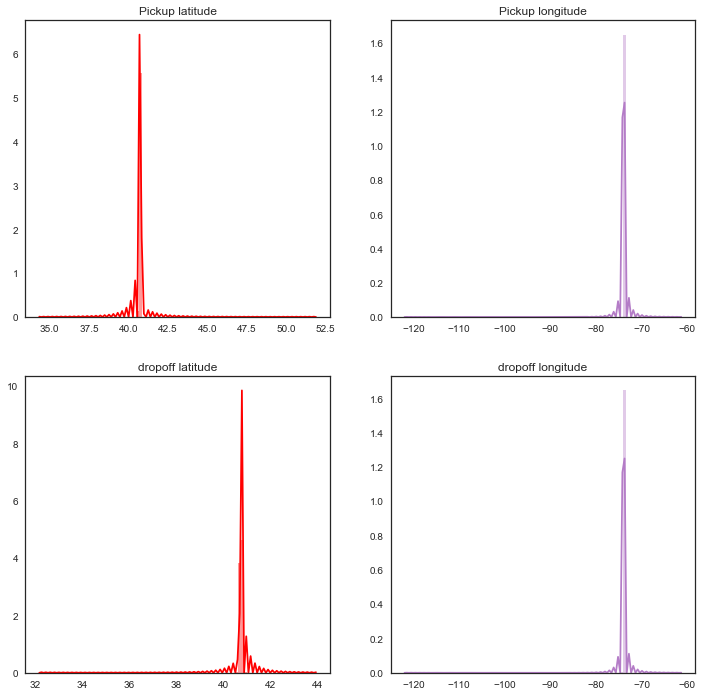

In [26]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(12,12), sharex=False, sharey = False)#
sns.distplot(train_data_raw['pickup_latitude'].values, label = 'pickup_latitude',color="red",bins = 100, ax=axes[0,0])
sns.distplot(train_data_raw['pickup_longitude'].values, label = 'pickup_longitude',color="m",bins =100, ax=axes[0,1])
sns.distplot(train_data_raw['dropoff_latitude'].values, label = 'dropoff_latitude',color="red",bins =100, ax=axes[1, 0])
sns.distplot(train_data_raw['dropoff_longitude'].values, label = 'dropoff_longitude',color="m",bins =100, ax=axes[1, 1])
axes[0,0].set_title('Pickup latitude')
axes[0,1].set_title('Pickup longitude')
axes[1,0].set_title('dropoff latitude')
axes[1,1].set_title('dropoff longitude')
plt.show()



As we can see that the pickup and dropoff latitude is maximum in the range of 40 to 41.5 and pickup and dropoff longitude is maximum in the range of -71 to 72.5. Others are taking very long time as the distance they cover is large and so will the time be more, so let's remove them and cap our data between these ranges and see the visualisation.

In [27]:
temp = train_data_raw.loc[(train_data_raw.pickup_latitude > 40.6) & (train_data_raw.pickup_latitude < 40.9)]
temp = temp.loc[(temp.dropoff_latitude>40.6) & (temp.dropoff_latitude < 40.9)]
temp = temp.loc[(temp.dropoff_longitude > -74.05) & (temp.dropoff_longitude < -73.7)]
temp = temp.loc[(temp.pickup_longitude > -74.05) & (temp.pickup_longitude < -7)]

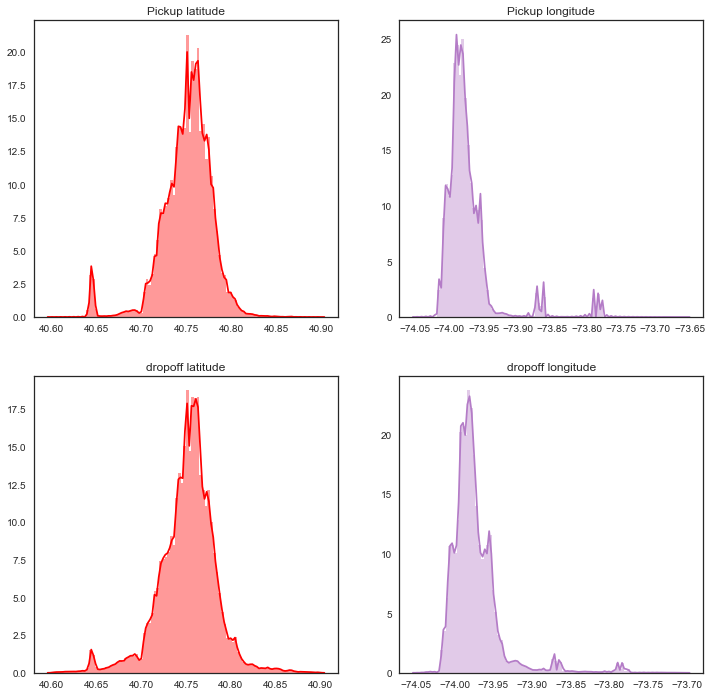

In [28]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(12,12), sharex=False, sharey = False)#
sns.distplot(temp['pickup_latitude'].values, label = 'pickup_latitude',color="red",bins = 100, ax=axes[0,0])
sns.distplot(temp['pickup_longitude'].values, label = 'pickup_longitude',color="m",bins =100, ax=axes[0,1])
sns.distplot(temp['dropoff_latitude'].values, label = 'dropoff_latitude',color="red",bins =100, ax=axes[1, 0])
sns.distplot(temp['dropoff_longitude'].values, label = 'dropoff_longitude',color="m",bins =100, ax=axes[1, 1])
axes[0,0].set_title('Pickup latitude')
axes[0,1].set_title('Pickup longitude')
axes[1,0].set_title('dropoff latitude')
axes[1,1].set_title('dropoff longitude')
plt.show()

Here we can see our visualisation of the capped pickup and dropoff coordinates.

Hence doing the same for trip_duration to remove the outliers.

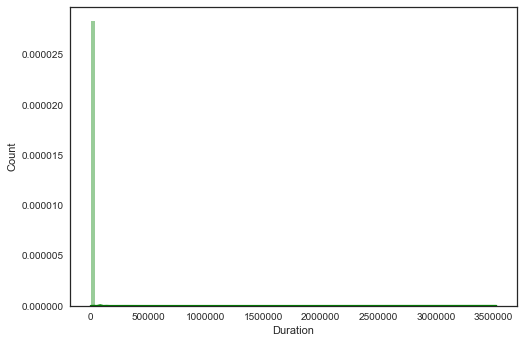

In [29]:
sns.set(style="white", palette="muted", color_codes=True)
plt.plot()#
sns.distplot(temp["trip_duration"], label = 'Trip DUration',color="green",bins = 100)
plt.xlabel("Duration")
plt.ylabel("Count")
plt.show()

Now we see that trip duration also requires some capping so we will do the same.

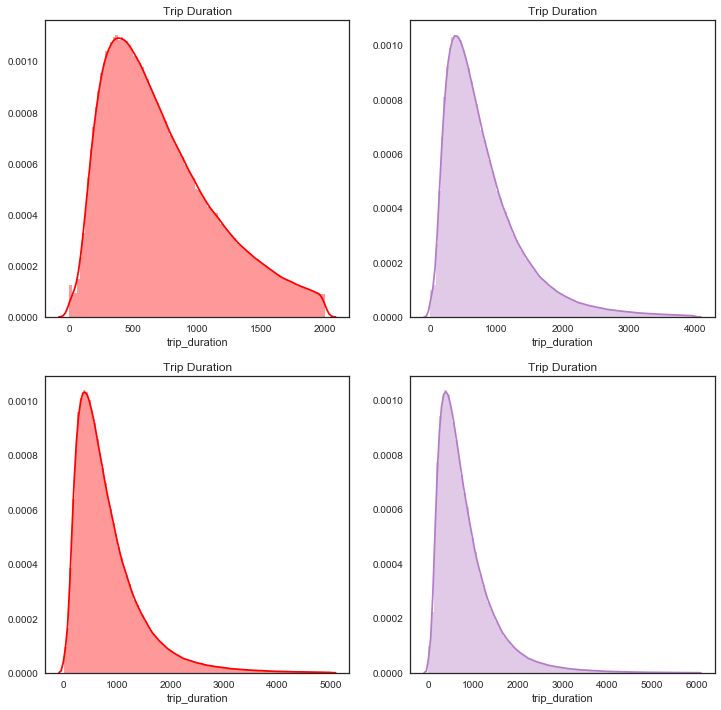

In [30]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(12,12), sharex=False, sharey = False)#
sns.distplot(temp[temp.trip_duration < 2000].trip_duration,color="red",bins = 100, ax=axes[0,0])
sns.distplot(temp[temp.trip_duration < 4000].trip_duration,color="m",bins =100, ax=axes[0,1])
sns.distplot(temp[temp.trip_duration < 5000].trip_duration, color="red",bins =100, ax=axes[1, 0])
sns.distplot(temp[temp.trip_duration < 6000].trip_duration, color="m",bins =100, ax=axes[1, 1])
axes[0,0].set_title('Trip Duration')
axes[0,1].set_title('Trip Duration')
axes[1,0].set_title('Trip Duration')
axes[1,1].set_title('Trip Duration')
plt.show()

From the above plots we can conclude that we can cap the trip duration to  4000 seconds which aproximately comes to around 67 minutes. 

In [31]:
temp = temp.loc[(train_data_raw.trip_duration <= 4000)]

In [32]:
temp.skew()

vendor_id           -0.137066
passenger_count      2.129922
pickup_longitude     3.315600
pickup_latitude     -1.060630
dropoff_longitude    2.991156
dropoff_latitude    -0.425629
trip_duration        1.695522
pweekday            -0.043768
phour               -0.445143
pmonth              -0.012114
radial_distance      2.830227
dtype: float64

Now we see that our dataset has been normalized to a good extent. Actually it all happened when i removed the outliers. The pickup and dropoff cordinates were taken care off and also the time taken as the maximum time was about 3526282 seconds which comes around to roughly 980 hours and minimum was for 1 second which is totally absurd so proper measures were taken to cap the trip duration and the coordinates. 

In [33]:
len(train_data_raw)-len(temp)

14204

We can see that we have removed about 14000 records which were either outliers our were misleading. Now copying temp to train_df variable

In [34]:
train_df=temp.copy()

Now we can see our actual dataset which we will be using to train our model

In [35]:
len(train_df)

1444380

In [36]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pweekday,phour,pmonth,radial_distance
count,1.444380e+06,1.444380e+06,1.444380e+06,1.444380e+06,1.444380e+06,1.444380e+06,1.444380e+06,1.444380e+06,1.444380e+06,1.444380e+06,1.444380e+06
mean,1.534186e+00,1.663855e+00,-7.397392e+01,4.075121e+01,-7.397330e+01,4.075210e+01,8.153426e+02,3.051370e+00,1.361186e+01,3.513793e+00,3.315283e+00
std,4.988301e-01,1.313915e+00,3.684233e-02,2.751247e-02,3.304127e-02,3.120559e-02,5.986495e+02,1.954840e+00,6.405135e+00,1.680716e+00,3.662710e+00
min,1.000000e+00,1.000000e+00,-7.404993e+01,4.060022e+01,-7.404999e+01,4.060004e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399188e+01,4.073755e+01,-7.399128e+01,4.073631e+01,3.950000e+02,1.000000e+00,9.000000e+00,2.000000e+00,1.226593e+00
50%,2.000000e+00,1.000000e+00,-7.398177e+01,4.075421e+01,-7.397974e+01,4.075465e+01,6.570000e+02,3.000000e+00,1.400000e+01,4.000000e+00,2.076291e+00
75%,2.000000e+00,2.000000e+00,-7.396751e+01,4.076840e+01,-7.396312e+01,4.076987e+01,1.060000e+03,5.000000e+00,1.900000e+01,5.000000e+00,3.803686e+00
max,2.000000e+00,9.000000e+00,-7.365336e+01,4.089941e+01,-7.370030e+01,4.089996e+01,4.000000e+03,6.000000e+00,2.300000e+01,6.000000e+00,3.306051e+01


In [37]:
train_df.head(5)
#test_data_raw.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pweekday,phour,pmonth,radial_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,17,3,1.497580
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,6,1.804374
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,1,6.381090
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,19,4,1.484566
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,13,3,1.187842


Now we drop some features which are not relevant to us and then break our dataset into features and targets. Here trip_duration is the traget. We will drop id's as they are unique for each journey. We will also drop pickup time and drop-off time as we have already converted them to the weekday hour and month.

In [38]:
train_df.shape

(1444380, 15)

In [39]:
train_df.drop(train_df.columns[[0,2,3]], axis=1, inplace=True)

In [40]:
train_df.head(5)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pweekday,phour,pmonth,radial_distance
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,17,3,1.497580
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,0,6,1.804374
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,11,1,6.381090
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,19,4,1.484566
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,13,3,1.187842


In [41]:
train_df.shape

(1444380, 12)

Now we will divide our dataset into features and target.We will then compare the shape of test dataset and the features which is done in order to make sure our features and the test dataset has the same columns

In [42]:
target=train_df["trip_duration"]
train_df.drop(train_df.columns[[7]], axis=1, inplace=True)
features=train_df.copy()

In [43]:
features.head(5)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pweekday,phour,pmonth,radial_distance
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,0,17,3,1.497580
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,6,0,6,1.804374
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,1,11,1,6.381090
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,2,19,4,1.484566
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,5,13,3,1.187842


Label encoding is a process by which categorical variables are converted into a form that could be provided to trainning  algorithms to do a better job in prediction.

In [44]:
from sklearn.preprocessing import LabelEncoder
features=features.apply(LabelEncoder().fit_transform)

Now we will plot the  corrleation heat map

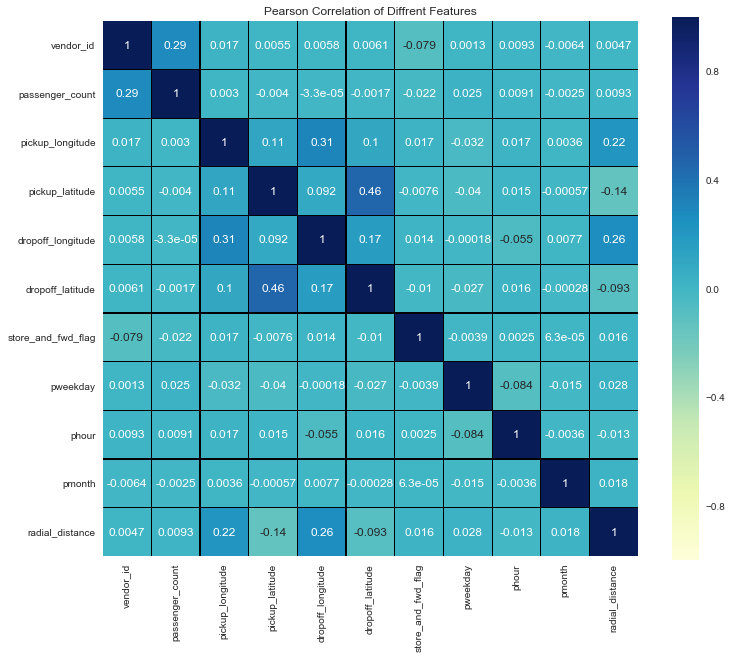

In [45]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Diffrent Features')
# Draw the heatmap using seaborn
sns.heatmap(features.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

The corrleation heat map does not suggest any thing great. It suggests that correlation exsists within the latitudes and longitudes and the distance which is quite obvious. We see that vendor id and passenger count are correlated as vendor id 2 is carrying 5 or 6 passengers most of the time.

Now its time to train our model.. Spliting the data into training and testing.

In [46]:
from sklearn.cross_validation import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)

# Show the results of the split
#print ("Training set has {} samples.",format(X_train.shape[0])
#print ("Testing set has {} samples.",format(X_test.shape[0]))

C:\Users\Aditya Jain\Anaconda2.7\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

The metrics used here is **root mean squared logarithmic error (rmsle)** so lower means better!



In [48]:
def rmsle(y_predicted, y_real):
    return np.sqrt(np.mean(np.power(np.log1p(y_predicted)-np.log1p(y_real), 2)))

**Decision Tree Regressor ** 

In [49]:
model_tree = DecisionTreeRegressor(min_samples_leaf=25, min_samples_split=25,random_state=42)
model_tree.fit(X_train,y_train)
#score=model_tree.score(X_test,y_test)
y_pred=model_tree.predict(X_test)

In [50]:
score=rmsle(y_pred,y_test)
print "Decision Tree Score = {}".format(score,2)

Decision Tree Score = 0.409805948623


We see that rmsle score obtained here is **0.409** which is very good.

In [51]:
for name, importance in zip(features.columns, model_tree.feature_importances_):
    print(name, importance)
    #dataz = pd.DataFrame({ 'Model':name, 'Error (RMSE)': importance})

('vendor_id', 0.00078290777997417846)
('passenger_count', 0.00042051159904821477)
('pickup_longitude', 0.025173423055849901)
('pickup_latitude', 0.016932706559599171)
('dropoff_longitude', 0.025687379764520624)
('dropoff_latitude', 0.037911976668330641)
('store_and_fwd_flag', 0.0)
('pweekday', 0.028583070364898933)
('phour', 0.076351406037954844)
('pmonth', 0.0079650548889178951)
('radial_distance', 0.78019156328090555)


In [52]:
d = []
for name, importance in zip(features.columns, model_tree.feature_importances_):
    d.append({'Name':name, 'imp':importance})

dataz=pd.DataFrame(d)

([<matplotlib.axis.XTick at 0x293336a0>,
 <a list of 11 Text xticklabel objects>)

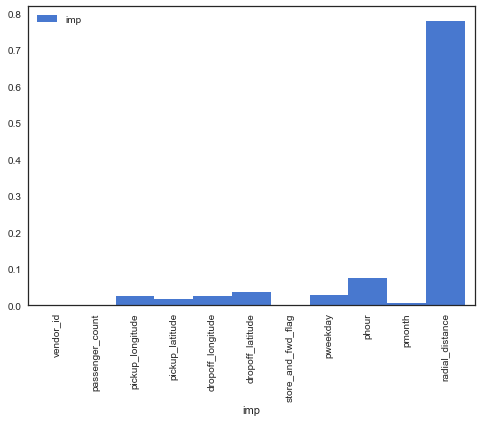

In [53]:
plt.figure(figsize=(12,12))
dataz.plot(x=dataz.imp, kind='bar',width=1)
pwnames = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag','pweekday','phour','pmonth','radial_distance']
plt.xticks(range(0,11),pwnames, rotation='vertical')

So we see which features have the greatest affect on trip duration. It would make logical sense that distance has the greatest affect. The further you travel, the longer it'll take. The rest of the features follow a similar logic in why it's ranked the way it is.

**Knn Model**

In [54]:
model_knn=KNeighborsRegressor(n_neighbors=25, weights='distance')
model_knn.fit(X_train,y_train)
y_pred=model_knn.predict(X_test)

In [55]:
score=rmsle(y_pred,y_test)
print "Knn Score = {}".format(score,2)

Knn Score = 0.452605166106


We see that rmsle score obtained here is **0.452** which is very good.